# Import Of Essential Libraries

In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Import of Dataset

In [2]:
traffic_collision_df=pd.read_csv('traffic-collision-data-from-2010-to-present.csv')

In [3]:
traffic_collision_df.head(5)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,...,STREET,SAN PEDRO ST,SLAUSON AV,"{'longitude': '-118.2696', 'human_address': '{...",22352.0,786.0,858.0,7.0,13.0,46.0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,Olympic,2054,997,TRAFFIC COLLISION,NaN,...,STREET,OLYMPIC BL,KINGSLEY AV,"{'longitude': '-118.3031', 'human_address': '{...",22723.0,617.0,646.0,NaN,12.0,89.0
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,Foothill,1669,997,TRAFFIC COLLISION,NaN,...,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"{'longitude': '-118.2704', 'human_address': '{...",3222.0,5.0,227.0,NaN,1.0,7.0
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,Southeast,1802,997,TRAFFIC COLLISION,0605,...,STREET,88TH ST,MAIN ST,"{'longitude': '-118.2739', 'human_address': '{...",22352.0,800.0,358.0,7.0,14.0,45.0
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,...,STREET,CROCKETT,SUNLAND,"{'longitude': '-118.3703', 'human_address': '{...",19335.0,166.0,272.0,NaN,3.0,21.0


## print the shape of the data

In [4]:
print(traffic_collision_df.shape)

(502858, 24)


## Show data description

In [5]:
print(traffic_collision_df.describe())

          DR Number  Time Occurred        Area ID  Reporting District  \
count  5.028580e+05  502858.000000  502858.000000       502858.000000   
mean   1.485742e+08    1355.002814      11.073369         1153.468528   
std    2.848089e+07     596.468096       5.876479          588.929125   
min    1.001000e+08       1.000000       1.000000          100.000000   
25%    1.217087e+08     930.000000       6.000000          666.000000   
50%    1.510145e+08    1430.000000      11.000000         1151.000000   
75%    1.715159e+08    1820.000000      16.000000         1651.000000   
max    1.999286e+08    2359.000000      21.000000         2199.000000   

       Crime Code     Victim Age   Premise Code      Zip Codes  Census Tracts  \
count    502858.0  424144.000000  502832.000000  502461.000000  496063.000000   
mean        997.0      41.425862     102.425695   20176.341768     561.509913   
std           0.0      16.227330      23.238999    6022.455454     391.202847   
min         997.0 

In [6]:
print(traffic_collision_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502858 entries, 0 to 502857
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   DR Number                          502858 non-null  int64  
 1   Date Reported                      502858 non-null  object 
 2   Date Occurred                      502858 non-null  object 
 3   Time Occurred                      502858 non-null  int64  
 4   Area ID                            502858 non-null  int64  
 5   Area Name                          502858 non-null  object 
 6   Reporting District                 502858 non-null  int64  
 7   Crime Code                         502858 non-null  int64  
 8   Crime Code Description             502858 non-null  object 
 9   MO Codes                           416597 non-null  object 
 10  Victim Age                         424144 non-null  float64
 11  Victim Sex                         4952

## Data visualization

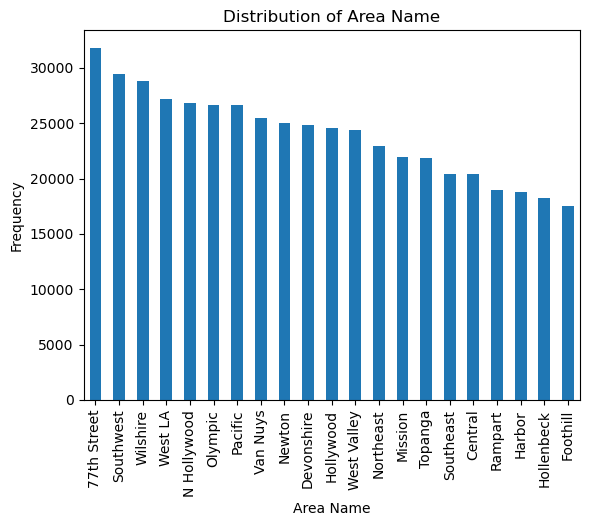

In [7]:
traffic_collision_df['Area Name'].value_counts().plot(kind='bar')
plt.title('Distribution of Area Name')
plt.xlabel('Area Name')
plt.ylabel('Frequency')
plt.show()

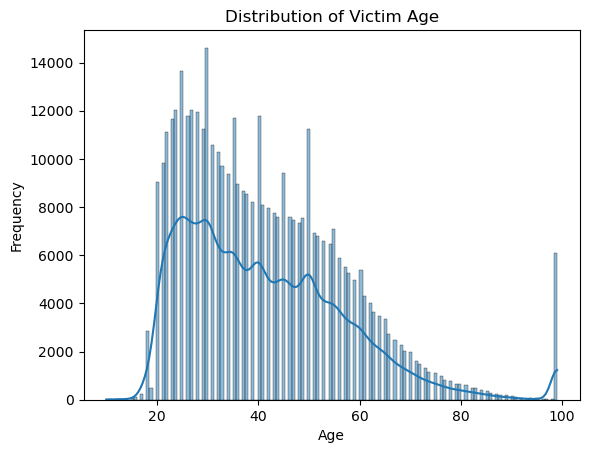

In [8]:
sns.histplot(traffic_collision_df['Victim Age'], kde=True)
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

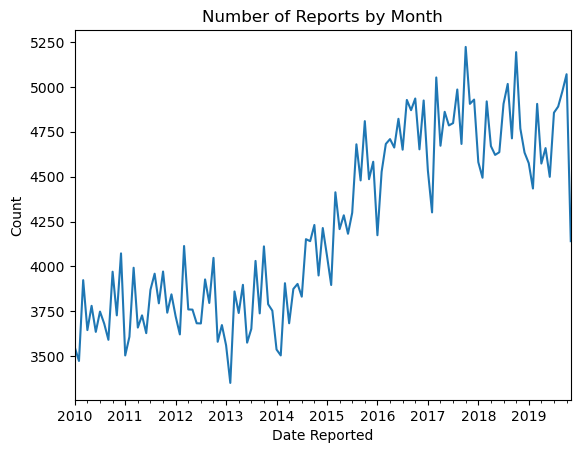

In [9]:
traffic_collision_df['Date Reported'] = pd.to_datetime(traffic_collision_df['Date Reported'])
traffic_collision_df.set_index('Date Reported', inplace=True)
traffic_collision_df.resample('M').size().plot()
plt.title('Number of Reports by Month')
plt.xlabel('Date Reported')
plt.ylabel('Count')
plt.show()

In [10]:
import folium

In [11]:
map_la = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

In [ ]:
for index, row in df.iterrows():
    location = eval(row['Location'])  # Convert the string to a dictionary
    latitude = float(location['latitude'])
    longitude = float(location['longitude'])
    crime_intensity = 1  # You can define your own metric for crime intensity
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=crime_intensity,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Crime Intensity: {crime_intensity}",
    ).add_to(map_la)


In [12]:
map_la

## Drop redundant column

In [13]:
traffic_collision_df = traffic_collision_df.drop(['Date Occurred'], axis= 1)

In [14]:
traffic_collision_df = traffic_collision_df.drop(['MO Codes'], axis= 1)

In [15]:
traffic_collision_df = traffic_collision_df.drop(['Location'], axis= 1)

In [16]:
traffic_collision_df = traffic_collision_df.drop(['Address'], axis= 1)

In [17]:
traffic_collision_df = traffic_collision_df.drop(['Cross Street'], axis= 1)

In [18]:
traffic_collision_df = traffic_collision_df.drop(['LA Specific Plans'], axis= 1)

In [19]:
traffic_collision_df

,DR Number,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Zip Codes,Census Tracts,Precinct Boundaries,Council Districts,Neighborhood Councils (Certified)
Date Reported,,,,,,,,,,,,,,,,,
2019-11-30,191323054,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,F,H,101.0,STREET,22352.0,786.0,858.0,13.0,46.0
2019-11-30,192020666,15,20,Olympic,2054,997,TRAFFIC COLLISION,40.0,M,W,101.0,STREET,22723.0,617.0,646.0,12.0,89.0
2019-11-30,191616992,230,16,Foothill,1669,997,TRAFFIC COLLISION,18.0,M,W,101.0,STREET,3222.0,5.0,227.0,1.0,7.0
2019-11-30,191824082,730,18,Southeast,1802,997,TRAFFIC COLLISION,23.0,M,H,101.0,STREET,22352.0,800.0,358.0,14.0,45.0
2019-11-30,191616980,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,M,H,101.0,STREET,19335.0,166.0,272.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01,100604050,335,6,Hollywood,637,997,TRAFFIC COLLISION,NaN,M,X,101.0,STREET,23446.0,427.0,573.0,8.0,64.0
2010-01-03,101404164,1900,14,Pacific,1437,997,TRAFFIC COLLISION,NaN,M,O,101.0,STREET,23451.0,896.0,1239.0,6.0,74.0
2010-01-01,101204051,900,12,77th Street,1259,997,TRAFFIC COLLISION,34.0,F,B,101.0,STREET,22352.0,790.0,998.0,13.0,46.0


## Convert categorical value into integer

In [20]:
traffic_collision_df['Area Name']=traffic_collision_df['Area Name'].astype('category').cat.codes
traffic_collision_df['Crime Code Description']=traffic_collision_df['Crime Code Description'].astype('category').cat.codes
traffic_collision_df['Victim Sex']=traffic_collision_df['Victim Sex'].astype('category').cat.codes
traffic_collision_df['Victim Descent']=traffic_collision_df['Victim Descent'].astype('category').cat.codes
traffic_collision_df['Premise Description']=traffic_collision_df['Premise Description'].astype('category').cat.codes

In [21]:
traffic_collision_df.head()

,DR Number,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Zip Codes,Census Tracts,Precinct Boundaries,Council Districts,Neighborhood Councils (Certified)
Date Reported,,,,,,,,,,,,,,,,,
2019-11-30,191323054,130,13,9,1385,997,0,NaN,0,7,101.0,94,22352.0,786.0,858.0,13.0,46.0
2019-11-30,192020666,15,20,11,2054,997,0,40.0,2,17,101.0,94,22723.0,617.0,646.0,12.0,89.0
2019-11-30,191616992,230,16,3,1669,997,0,18.0,2,17,101.0,94,3222.0,5.0,227.0,1.0,7.0
2019-11-30,191824082,730,18,14,1802,997,0,23.0,2,7,101.0,94,22352.0,800.0,358.0,14.0,45.0
2019-11-30,191616980,720,16,3,1689,997,0,NaN,2,7,101.0,94,19335.0,166.0,272.0,3.0,21.0


## Data Preproceesing (Null value check)

In [22]:
traffic_collision_df.isnull().sum()

DR Number                                0
Time Occurred                            0
Area ID                                  0
Area Name                                0
Reporting District                       0
Crime Code                               0
Crime Code Description                   0
Victim Age                           78714
Victim Sex                               0
Victim Descent                           0
Premise Code                            26
Premise Description                      0
Zip Codes                              397
Census Tracts                         6795
Precinct Boundaries                   3156
Council Districts                     5874
Neighborhood Councils (Certified)    25062
dtype: int64

In [23]:
traffic_collision_df=traffic_collision_df.dropna()

In [24]:
traffic_collision_df.head()

,DR Number,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Zip Codes,Census Tracts,Precinct Boundaries,Council Districts,Neighborhood Councils (Certified)
Date Reported,,,,,,,,,,,,,,,,,
2019-11-30,192020666,15,20,11,2054,997,0,40.0,2,17,101.0,94,22723.0,617.0,646.0,12.0,89.0
2019-11-30,191616992,230,16,3,1669,997,0,18.0,2,17,101.0,94,3222.0,5.0,227.0,1.0,7.0
2019-11-30,191824082,730,18,14,1802,997,0,23.0,2,7,101.0,94,22352.0,800.0,358.0,14.0,45.0
2019-11-30,191824078,1050,18,14,1836,997,0,54.0,0,2,101.0,94,24354.0,817.0,1187.0,15.0,40.0
2019-11-30,190417458,130,4,5,411,997,0,33.0,0,2,101.0,94,23448.0,492.0,943.0,11.0,1.0


In [25]:
traffic_collision_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396889 entries, 2019-11-30 to 2010-01-02
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   DR Number                          396889 non-null  int64  
 1   Time Occurred                      396889 non-null  int64  
 2   Area ID                            396889 non-null  int64  
 3   Area Name                          396889 non-null  int8   
 4   Reporting District                 396889 non-null  int64  
 5   Crime Code                         396889 non-null  int64  
 6   Crime Code Description             396889 non-null  int8   
 7   Victim Age                         396889 non-null  float64
 8   Victim Sex                         396889 non-null  int8   
 9   Victim Descent                     396889 non-null  int8   
 10  Premise Code                       396889 non-null  float64
 11  Premise Description    

In [26]:
feature_cols = ['Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description', 'Zip Codes', 'Census Tracts', 'Precinct Boundaries', 'Council Districts', 'Neighborhood Councils (Certified)']
X = traffic_collision_df[feature_cols]
y = traffic_collision_df['Area Name']

## Test train Splitting

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [29]:
X_train.shape, X_test.shape

((265915, 10), (130974, 10))

# ML Model Implementation

## XGBoost

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [31]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, seed = 42)

In [32]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [33]:
y_pred = xg_reg.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 18.317312240600586


In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 52.12%


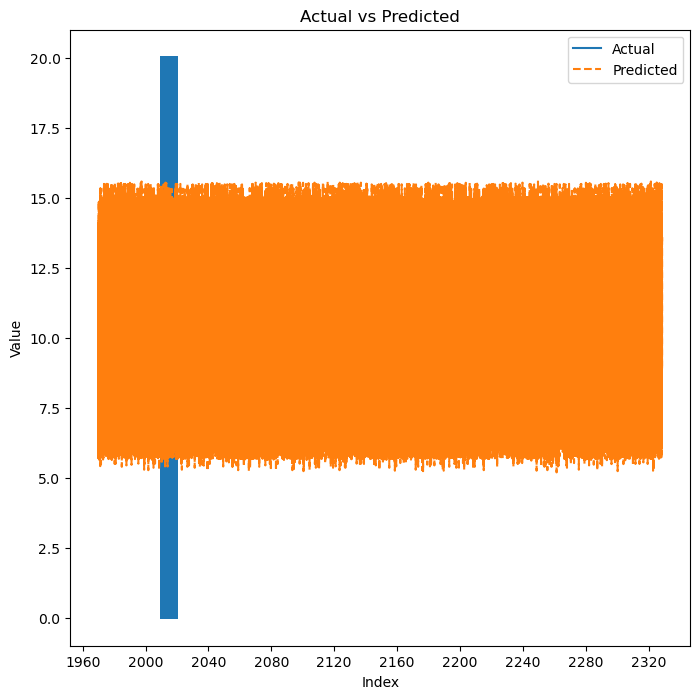

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## Ridge Regression

Mean Squared Error (Ridge Regression): 35.94
Ridge Regression Accuracy: 6.07%


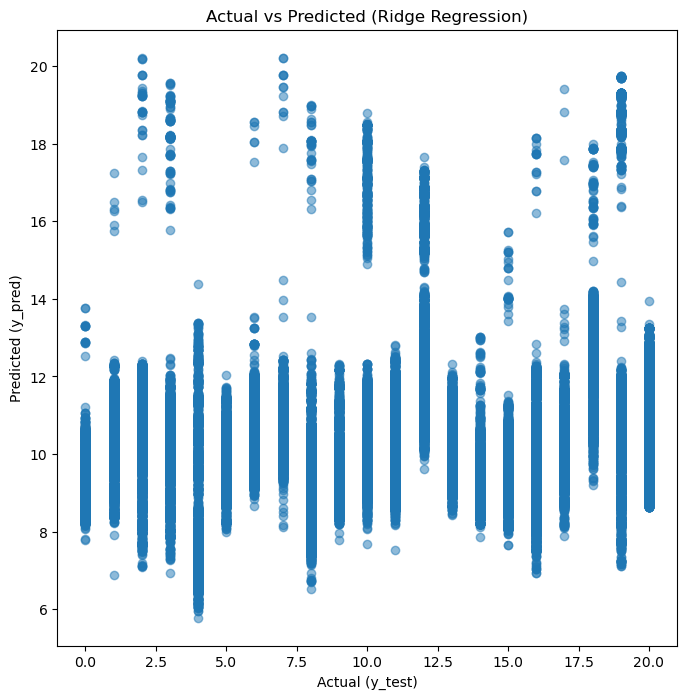

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Instantiate the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # 'alpha' is the regularization strength

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate Mean Squared Error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Print Mean Squared Error
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.2f}")

# Calculate R2 score
r2_ridge = r2_score(y_test, y_pred_ridge)
accuracy_percentage_ridge = r2_ridge * 100

# Print accuracy
print(f"Ridge Regression Accuracy: {accuracy_percentage_ridge:.2f}%")

# Plot actual vs predicted for Ridge Regression
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.show()

## Elastic net Regressor

Mean Squared Error (Elastic Net Regression): 36.03
Elastic Net Regression Accuracy: 5.84%


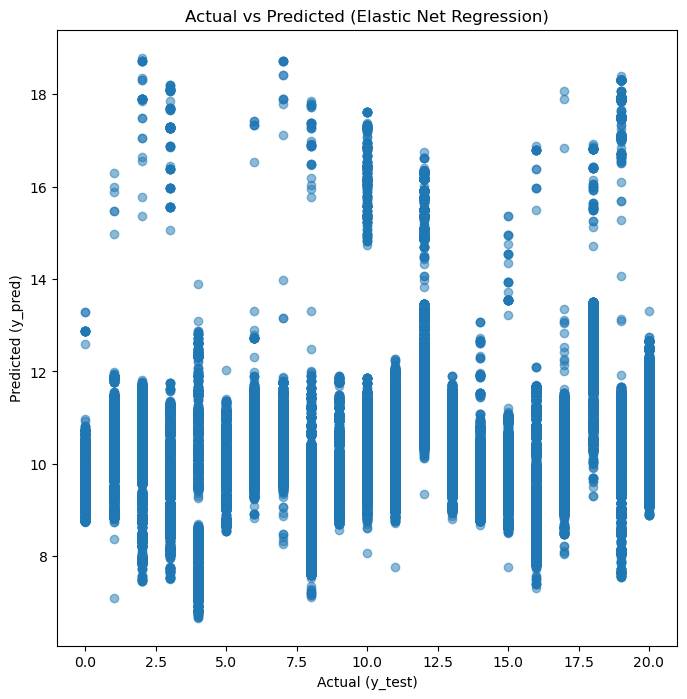

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Instantiate the Elastic Net Regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # 'alpha' is the regularization strength, 'l1_ratio' balances L1 and L2 penalties

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_elastic_net = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

# Print Mean Squared Error
print(f"Mean Squared Error (Elastic Net Regression): {mse_elastic_net:.2f}")

# Calculate R2 score
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
accuracy_percentage_elastic_net = r2_elastic_net * 100

# Print accuracy
print(f"Elastic Net Regression Accuracy: {accuracy_percentage_elastic_net:.2f}%")

# Plot actual vs predicted for Elastic Net Regression
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5)
plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')
plt.title('Actual vs Predicted (Elastic Net Regression)')
plt.show()

## Robust Regressor

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mean Squared Error (Huber Regressor): 38.59
Huber Regressor Accuracy: -0.86%


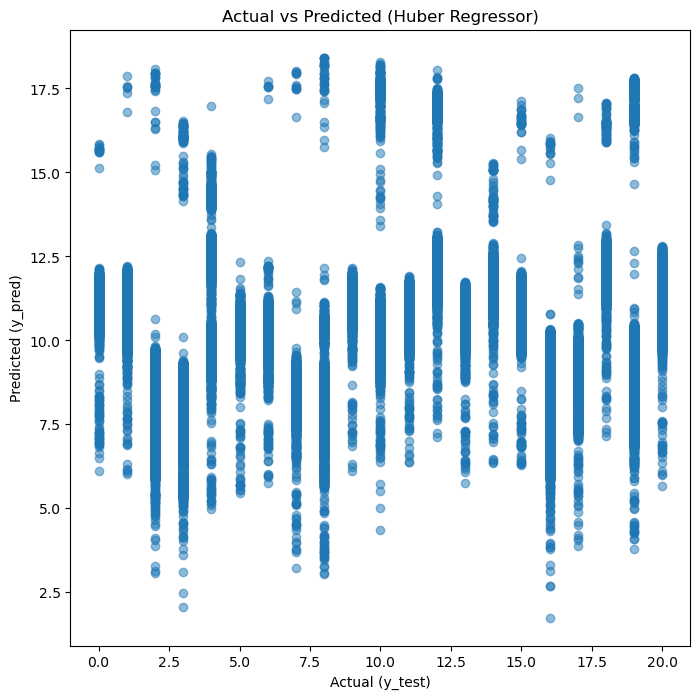

In [39]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Huber Regressor model
huber_reg = HuberRegressor(epsilon=1.35)

# Fit the model to the training data
huber_reg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_huber = huber_reg.predict(X_test)

# Calculate Mean Squared Error
mse_huber = mean_squared_error(y_test, y_pred_huber)

# Print Mean Squared Error
print(f"Mean Squared Error (Huber Regressor): {mse_huber:.2f}")

# Calculate R2 score
r2_huber = r2_score(y_test, y_pred_huber)
accuracy_percentage_huber = r2_huber * 100

# Print accuracy
print(f"Huber Regressor Accuracy: {accuracy_percentage_huber:.2f}%")

# Plot actual vs predicted for Huber Regressor
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_huber, alpha=0.5)
plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')
plt.title('Actual vs Predicted (Huber Regressor)')
plt.show()